In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import re

import itertools
import nltk
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
# import xgboost as xgb
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

from Funciones_Datos import *
from Funciones_NLP import *

In [2]:
# Cargamos el Dataset
viviendas = pd.read_csv('proyecto_viviendas.csv')

In [3]:
viviendas2, descripciones, titulos = process_viviendas_data(viviendas)

c:\Users\ruben\OneDrive\Documentos\Bootcamp\Apuntes Bootcamp\Librerías\Proyecto Final\Proyecto\Funciones_Datos.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  viviendas['Equipamientos'] = viviendas['Equipamientos'].str.replace('[', '').str.replace(']', '')
c:\Users\ruben\OneDrive\Documentos\Bootcamp\Apuntes Bootcamp\Librerías\Proyecto Final\Proyecto\Funciones_Datos.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  viviendas['Características'] = viviendas['Características'].str.replace('[', '').str.replace(']', '')
c:\Users\ruben\OneDrive\Documentos\Bootcamp\Apuntes Bootcamp\Librerías\Proyecto Final\Proyecto\Funciones_Datos.py:21: FutureWarning: The default value of re

In [4]:
viviendas_nlp = pd.concat([descripciones, titulos], axis=1)

In [5]:
# Usamos la función clean_viviendas_nlp para limpiar nans
viviendas_nlp = clean_viviendas_nlp(viviendas_nlp)
print(viviendas_nlp.isnull().sum())
print('Duplicados ', viviendas_nlp.duplicated().sum())

Descripciones    0
Títulos          0
dtype: int64
Duplicados  0


In [6]:
viviendas_nlp

,Descripciones,Títulos
0,Acacia Wellness ofrece en VENTA:\n\nPiso de 16...,Piso en venta en Pacífico de 5 habitaciones co...
1,Vivienda2 te ofrece la oportunidad de adquirir...,Piso en venta en Justicia - Chueca de 1 habita...
2,Vivienda2 vende local habilitado como apartame...,Venta de piso en Embajadores - Lavapiés de 1 h...
3,Se vende fantastica vivienda arrendada con inq...,Venta de piso en Canillas de 4 habitaciones co...
4,Se vende fantastica vivienda arrendada con inq...,Venta de piso en Piovera - Conde Orgaz de 4 ha...
...,...,...
7559,Grupo Alain pone a su disposición espectacular...,Venta de piso en Palacio de 2 habitaciones con...
7560,Grupo Alain les presenta en exclusiva 5 vivien...,Venta de piso en Bernabéu - Hispanoamérica de ...
7561,CASAS CASTELLÓ VENDE ESTE INCREÍBLE INMUEBLE a...,Piso en venta en Universidad - Malasaña de 3 h...
7562,"Haro Gestión Inmobiliaria comercializa, estupe...",Piso en venta en calle De Andrés Tamayo de 1 h...


In [7]:
#viviendas_nlp.to_csv('viviendas_nlp.csv', index=True)

In [8]:
viviendas_nlp.shape

(7564, 2)

In [9]:
# Sacamos las stopwords en español
stopwords = nltk.corpus.stopwords.words('spanish')

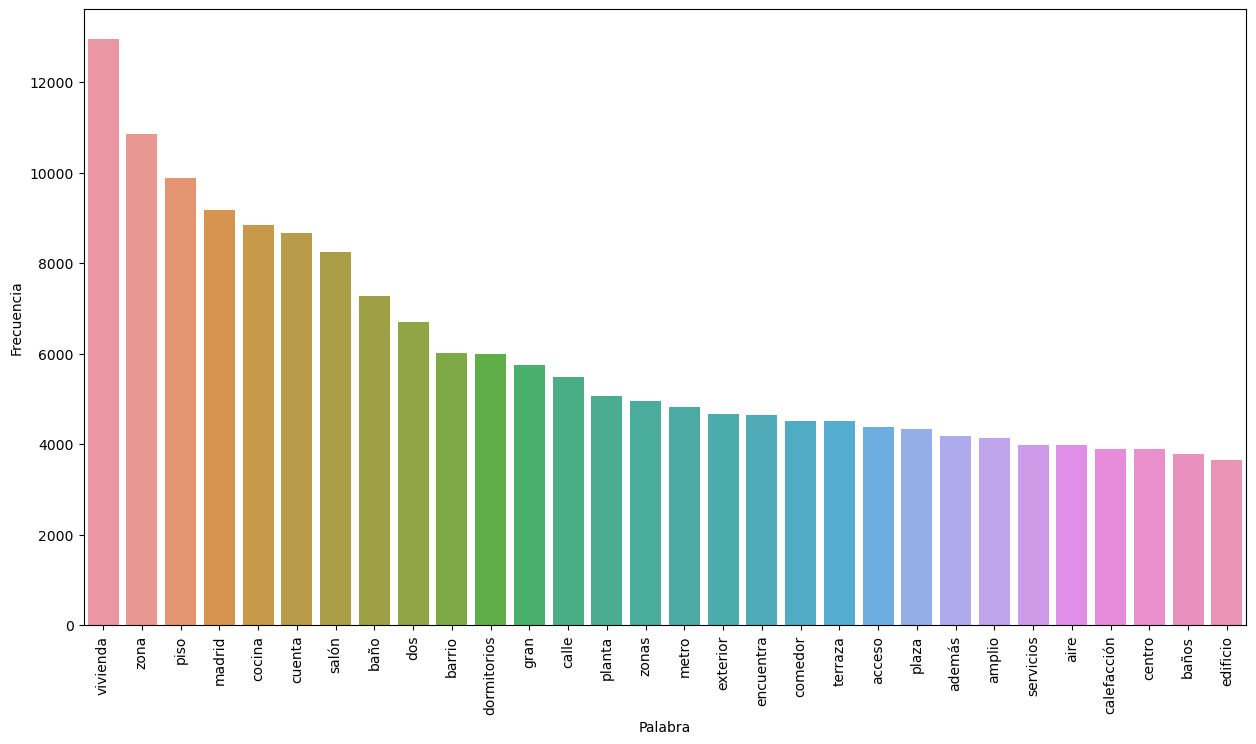

In [10]:
df_descripciones = get_descripciones(viviendas_nlp, stopwords)

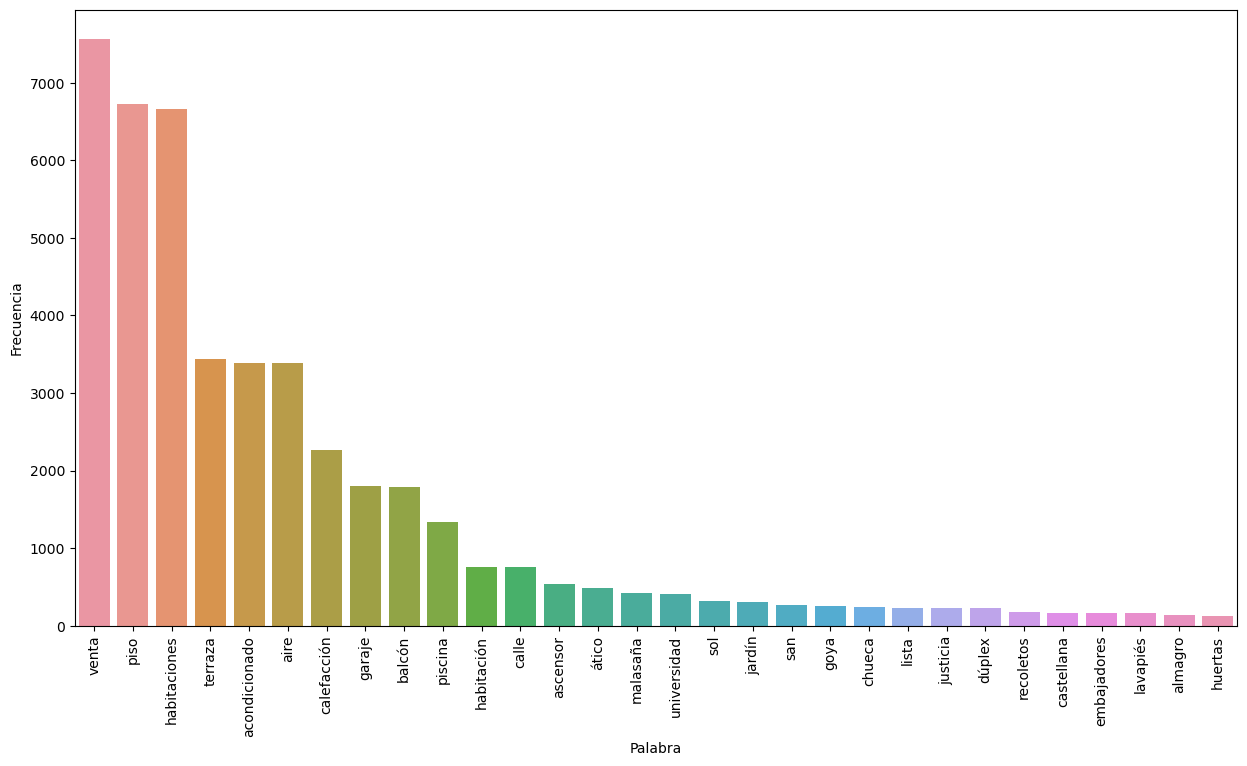

In [11]:
df_titulos = get_titulos(viviendas_nlp, stopwords)

In [12]:
stemmer = PorterStemmer()
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
descripciones_list=[]
for descripcion in viviendas_nlp.Descripciones:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    descripcion = re.sub("[^a-zA-Z]"," ",str(descripcion)) # Solo nos quedamos con los caracteres que incluyan letras, mayúsculas o minúsculas
    # Pasamos todo a minúsculas
    descripcion = descripcion.lower()
    # Tokenizamos para separar las palabras del titular
    descripcion = nltk.word_tokenize(descripcion)
    # Eliminamos las palabras de menos de 3 letras
    descripcion = [palabra for palabra in descripcion if len(palabra)>3]
    # Sacamos las Stopwords
    descripcion = [palabra for palabra in descripcion if not palabra in stopwords]

    ## Stemming de la descripción

    # Aplicamos la funcion para buscar la raiz de las palabras
    # descripcion = [stemmer.stem(palabra) for palabra in descripcion]
    # Por ultimo volvemos a unir el titular
    descripcion = " ".join(descripcion) # Volvemos a unir todas las palabras en un solo string separadas por espacios
    # Consiguiendo de nuevo un titular normalizado

    # Vamos armando una lista con todos los titulares
    descripciones_list.append(descripcion)
    #dataset["titular_normalizado"] = titular_list

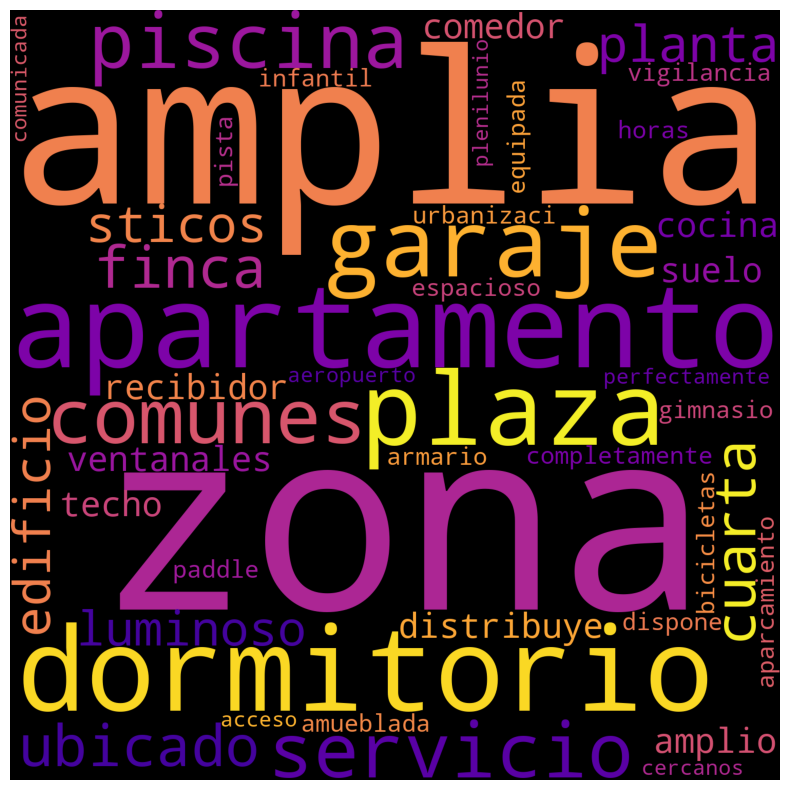

In [13]:
wordcloud_desc = WordCloud(width=1500, height=1500, margin=0, background_color='black', colormap="plasma_r", stopwords = stopwords).generate(descripcion)
plot_cloud(wordcloud_desc)